<h1><b>КОДИИМ</b></h1>

<h3>Домашнее задание: Изучение scikit-learn и KNN</h3>

<h4>Введение:</h4>

В данном домашнем задании мы будем использовать библиотеку scikit-learn для обучения и оценки модели с использованием алгоритма K-Nearest Neighbors (KNN) для задачи классификации и регрессии. KNN - это метод, который предсказывает значения для новых точек данных, основываясь на близости к соседним точкам в обучающем наборе данных.

**Задание:**

<br>

1. *Освоение scikit-learn:*

*   Импортируйте необходимые библиотеки.
*   Загрузите датасет
*   Разделите данные на тренировочную и тестовую выборки.


<br>

2. *Обучение модели:*


*   Создайте модель K-Nearest Neighbors для регрессии с помощью написания классов Классификатора и Регрессора.
*   Обучите модель на тренировочных данных с использованием метода fit().


<br>


3. *Предсказание и оценка:*

* Предскажите классы для тестовых данных с использованием метода predict().
* Оцените точность предсказания с использованием метрик, таких как mean_absolute_error


<br>


4. *Визуализация результатов:*

* Визуализируйте фактические и предсказанные значения с использованием библиотеки Seaborn.


<br>

**Инструкции:**

Используйте предложенный код в ячейках для выполнения каждого этапа задания.

Дополните код.

Обратите внимание на результаты и выводы для каждого этапа.

**Подсказки:**

Не забывайте документировать ваш код.

Экспериментируйте с различными параметрами модели и смотрите, как они влияют на результаты.

Если возникнут вопросы, обращайтесь к документации scikit-learn.

Удачи!

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import mean_absolute_error

In [ ]:
# Загрузим датасет
data = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")
X = data.drop("survived", axis = 1)
y = data["survived"]

In [ ]:
# Заменим категориальные переменные на числовые (слова на цифры, потому что наша модель понимает только цифры)
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
# Удалим столбцы, которые мы не будем использовать в качестве признаков
X = X.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
# Заполним пропущенные значения средними значениями
...

In [ ]:
# убедимся, что нет пропусков в наших данных (а то модель не будет работать!)
# если пропуски все таки есть, нужно что -то сделать. Или удалить столбец,
#  или заполнить их как-то (средними или нулем)
X.isna().sum()

In [ ]:
# Данные теперь готовы для обучения нашей модели
# Разделим датасет на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(...)

In [ ]:
# Напишем свой класс для классификации

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Метод для обучения модели на тренировочных данных.

        Parameters:
        - X_train: массив признаков тренировочных данных
        - y_train: массив целевых значений тренировочных данных
        """
        # Заменяем пропуски на np.nan
        self.X_train = X_train.apply(pd.to_numeric, errors='coerce').values
        self.y_train = y_train.values

    def predict(self, X_test):
        """
        Метод для предсказания классов на тестовых данных.

        Parameters:
        - X_test: массив признаков тестовых данных

        Returns:
        - y_pred: массив предсказанных классов
        """
        # Заменяем пропуски на np.nan
        X_test = X_test.replace('...', np.nan)
        X_test = X_test.apply(pd.to_numeric, errors='coerce').values

        y_pred = []
        # проходимся по всем строкам, для каждой нужно сделать предсказание

        for _, x in X_test.iterrows():
            # считаем расстояния до всех строк из трейна
            distances =  ...

            # Индексы ближайших соседей
            indices = np.argsort(distances)[:self.k]

            # Значения целевой переменной для соседей
            neighbors_values = self.y_train[indices]
            # Находим наиболее часто встречающийся класс среди соседей
            most_common_class = ...
            y_pred.append(most_common_class)

        return np.array(y_pred)

In [ ]:
# Напишем свой класс для регрессии

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Метод для обучения модели на тренировочных данных.

        Parameters:
        - X_train: массив признаков тренировочных данных
        - y_train: массив целевых значений тренировочных данных
        """
        # Заменяем пропуски на np.nan
        X_train.replace('...', np.nan, inplace=True)
        X_train = X_train.apply(pd.to_numeric, errors='coerce')
        X_train = X_train.dropna()
        self.X_train = X_train.values

        # Заменяем пропуски на np.nan
        y_train.replace('...', np.nan, inplace=True)
        y_train = y_train.apply(pd.to_numeric, errors='coerce')
        y_train = y_train.dropna()
        self.y_train = y_train.values

    def predict(self, X_test):
        """
        Метод для предсказания значений на тестовых данных.

        Parameters:
        - X_test: массив признаков тестовых данных

        Returns:
        - y_pred: массив предсказанных значений
        """
        # Заменяем пропуски на np.nan
        X_test.replace('...', np.nan, inplace=True)
        X_test = X_test.apply(pd.to_numeric, errors='coerce')
        X_test = X_test.dropna()
        X_test = X_test.values

        y_pred = []
        # проходимся по всем строкам, для каждой нужно сделать предсказание
        for _, x in X_test.iterrows():
            # считаем расстояния до всех строк из трейна
            distances =  ...

            # Индексы ближайших соседей
            indices = np.argsort(distances)[:self.k]

            # Значения целевой переменной для соседей
            neighbors_values = self.y_train[indices]
            # берем среднее среди соседей
            most_common_class = ...
            y_pred.append(most_common_class)
            
        return np.array(y_pred)

In [ ]:
# Инициализируем модель KNNClassifier с количеством соседей, равным 3
neigh = KNNClassifier(...)
# Обучаем модель на тренировочных данных
neigh.fit(...)
# Предсказываем значения на тестовых данных
y_pred = ...

In [ ]:
# Оценим точность предсказаний
accuracy = accuracy_score(...)
print(f'Точность предсказания: {accuracy * 100:.2f}%')
# Выведем отчет по классификации и матрицу ошибок
print("\nОтчет по классификации:\n", classification_report(...))

Точность предсказания: 58.66%

Отчет по классификации:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68       105
           1       0.50      0.35      0.41        74

    accuracy                           0.59       179
   macro avg       0.56      0.55      0.55       179
weighted avg       0.57      0.59      0.57       179



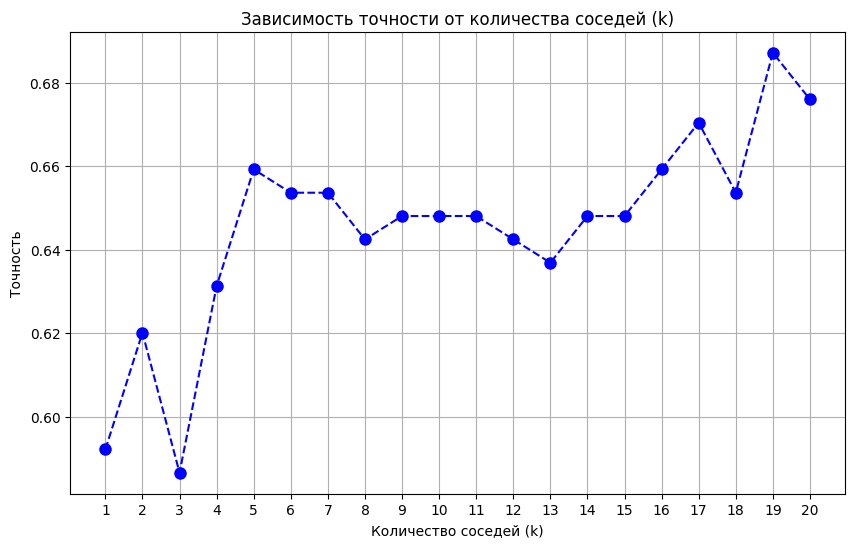

In [ ]:
# Инициализируем список для сохранения точности
accuracy_scores = []

# Попробуем разные значения k
for k in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=...)
    neigh.fit(...)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(...)
    accuracy_scores.append(...)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(...), accuracy_scores, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title('Зависимость точности от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(range(1, 21))
plt.grid(True)
...

In [ ]:
from sklearn.datasets import fetch_california_housing
# Загрузим датасет
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

In [ ]:
# Выберем признаки и целевую переменную
X_reg = data.drop('PRICE', axis=1)
y_reg = data['PRICE']

In [ ]:
# Разделим данные на тренировочные и тестовые
...

In [ ]:
# Инициализируем и обучим модель KNN регрессии
knn_regressor = ...
...

KNeighborsRegressor()

In [ ]:
# Предсказание на тестовых данных
y_pred = ...

# Оценка производительности модели
mae = ...
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.8342932400678295


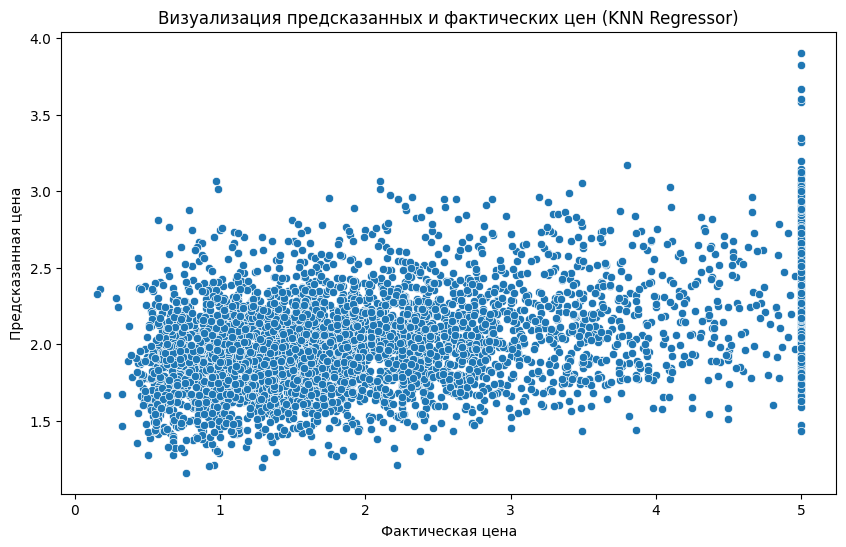

In [ ]:
# Визуализация предсказанных значений и фактических значений
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title('Визуализация предсказанных и фактических цен (KNN Regressor)')
plt.show()

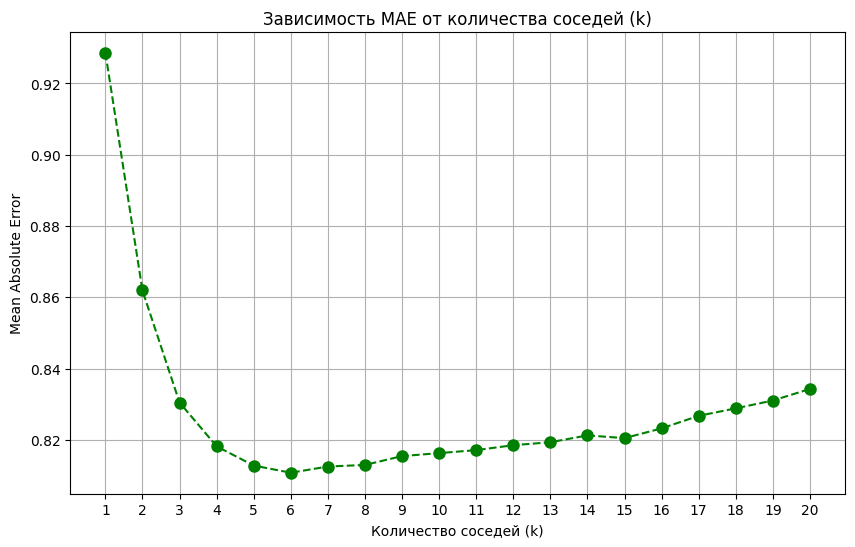

In [ ]:
# Инициализируем список для сохранения средней абсолютной ошибки
mae_scores = []

# Попробуем разные значения k
for k in range(...):
    knn_regressor = ...
    knn_regressor.fit(...)
    y_pred = knn_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(...)

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mae_scores, marker='o', linestyle='dashed', color='green', markersize=8)
plt.title('Зависимость MAE от количества соседей (k)')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(...))
plt.grid(True)
plt.show()